<a href="https://colab.research.google.com/github/mhtattersall/LLM/blob/main/GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# PDFplumber is a Python library that provides tools to extract information from PDF files
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.4 MB/s eta 0:00:00


In [4]:
# Pytesseract is a Python wrapper for Google's Tesseract-OCR Engine, which is an open-source optical character recognition (OCR) tool
!pip install pytesseract

In [8]:
import pdfplumber
from PIL import Image # PIL (Python Imaging Library) module is used for opening, manipulating, and saving many different image file formats
import pytesseract

# Path to the PDF file
pdf_path = '/content/sample_data/PSF.pdf'

# Open the PDF file
with pdfplumber.open(pdf_path) as pdf:
    # Initialize an empty list to store PIL image objects
    pdf_images = []

    # Iterate over each page
    for page_num in range(len(pdf.pages)):
        # Access each page
        page = pdf.pages[page_num]

        # Render the page to an image (PIL Image)
        pil_image = page.to_image(resolution=300).original

        # Append the PIL image to the list
        pdf_images.append(pil_image)

# Print the number of pages converted
print("Number of pages:", len(pdf_images))

Number of pages: 4


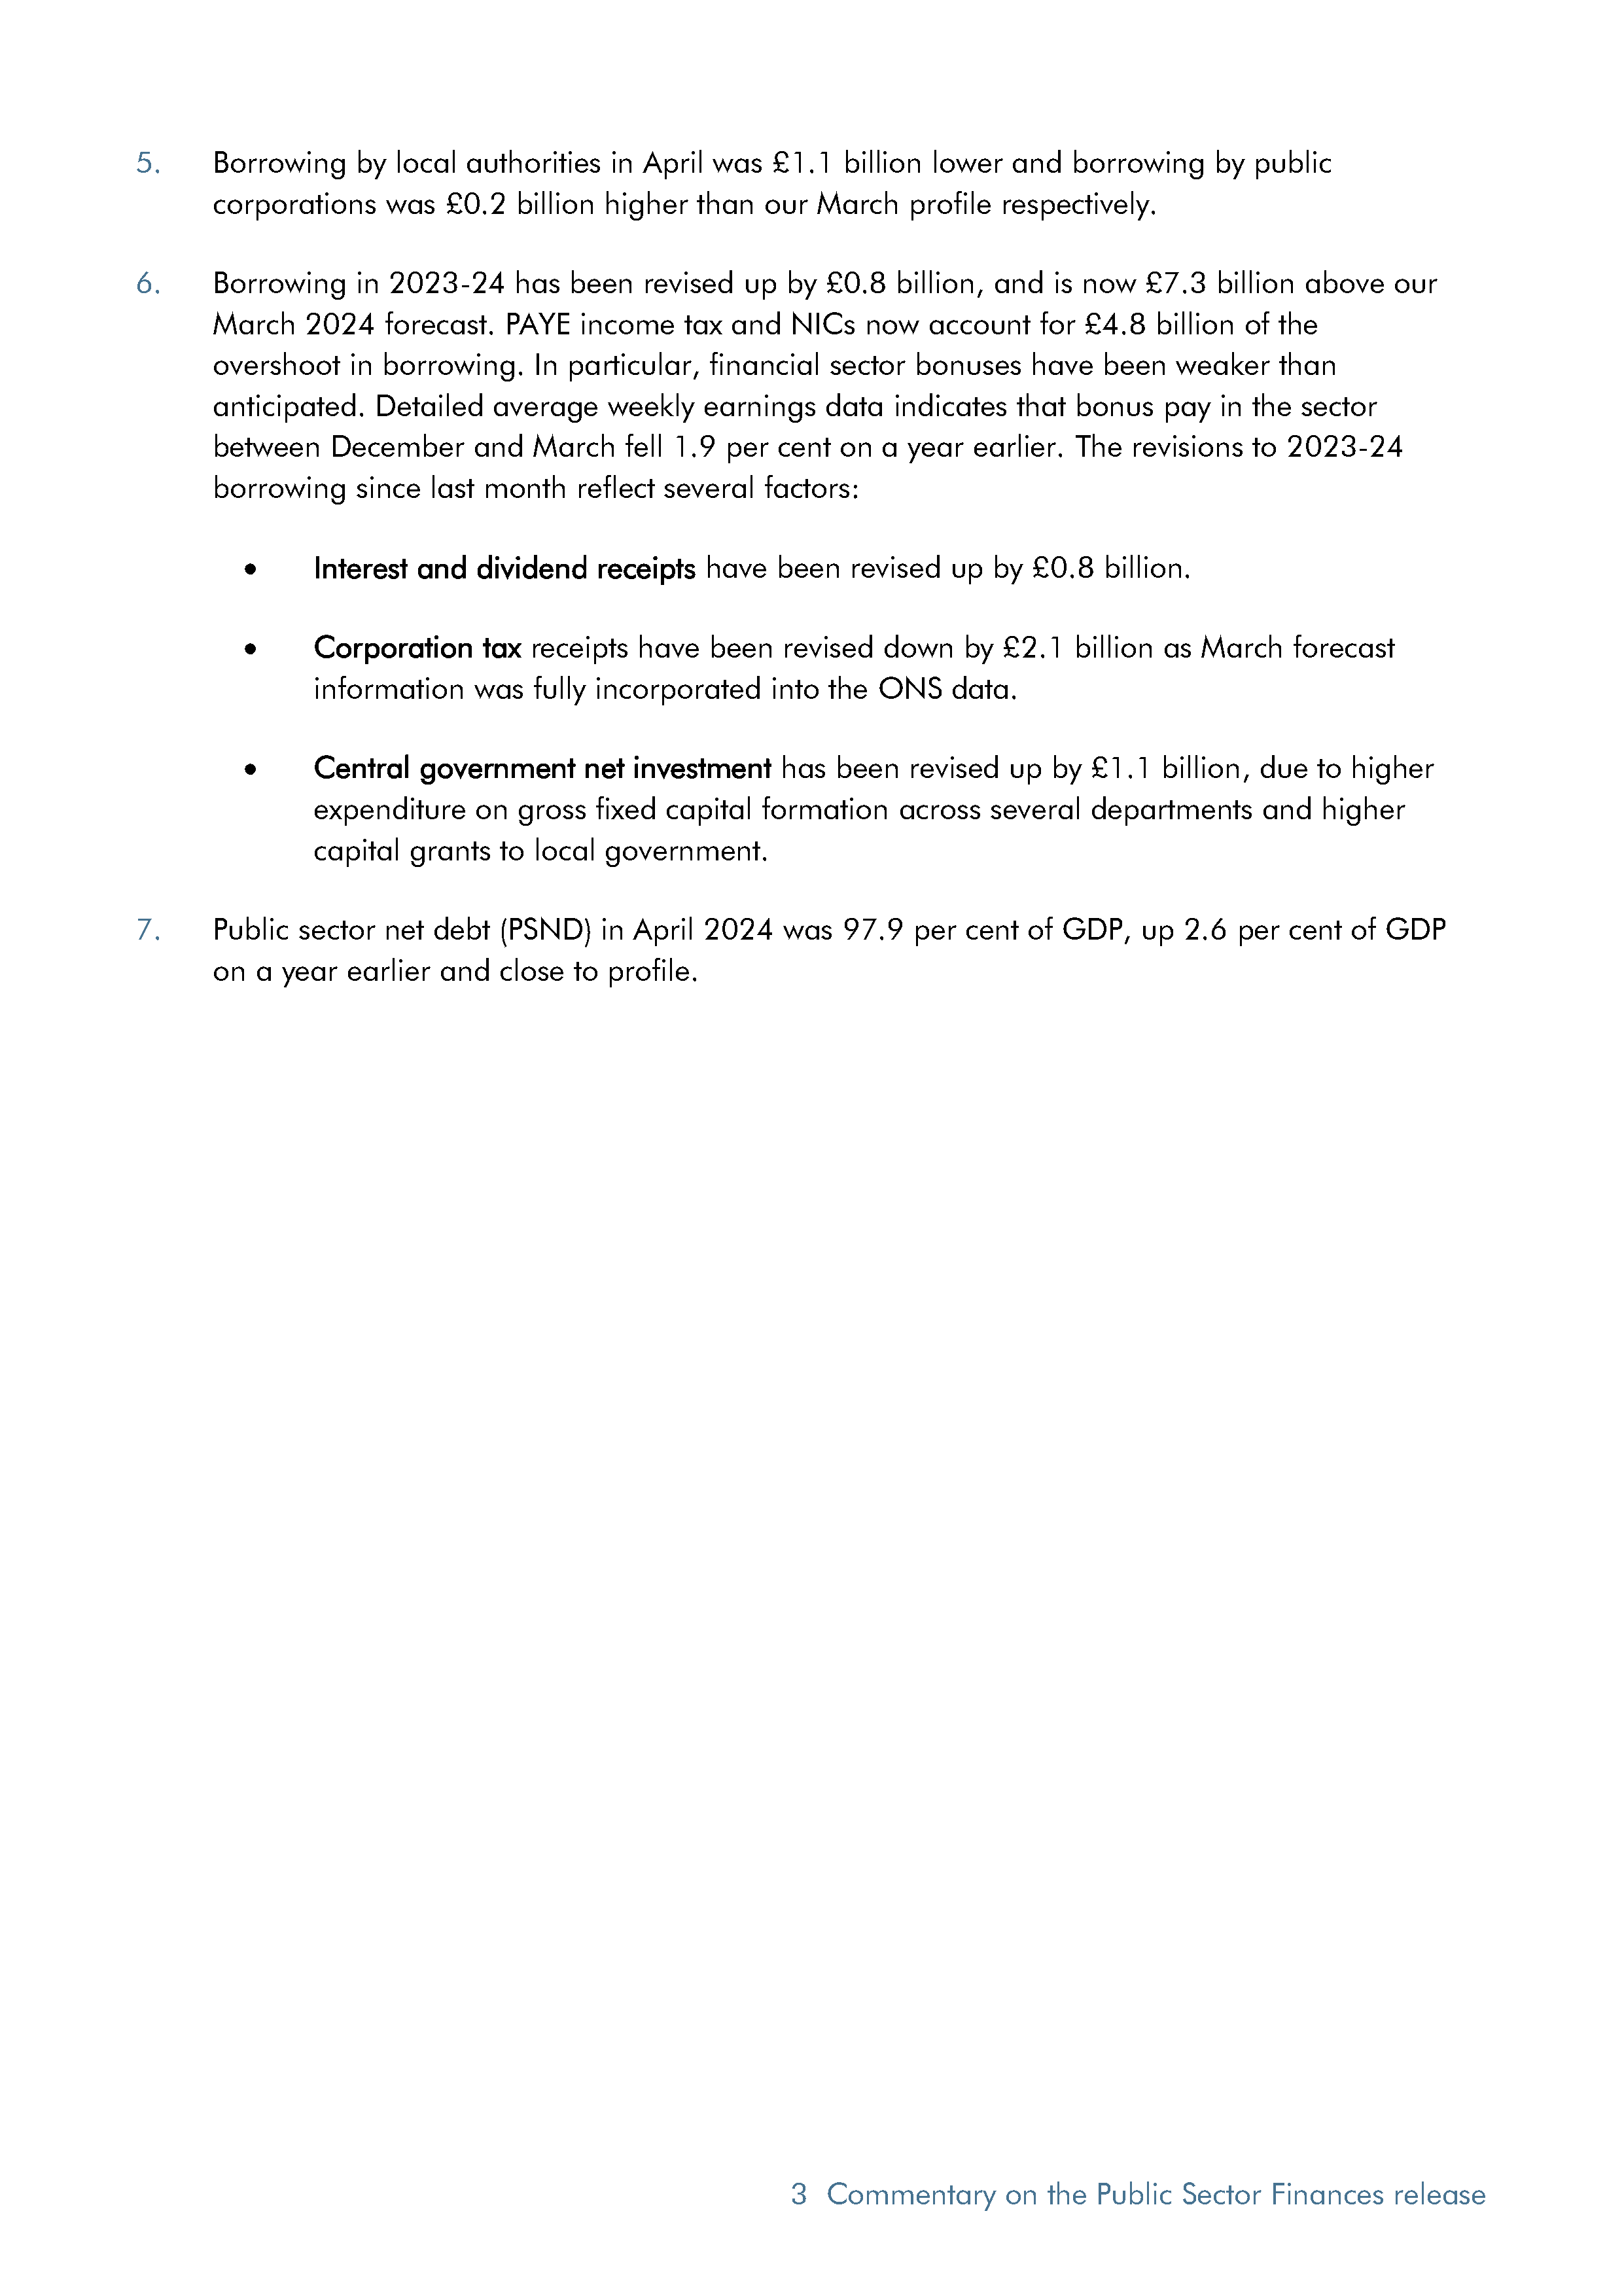

In [ ]:
# view an example page, in this case page 3 (at index 2 of the list)
pdf_images[2]

In [9]:
# Install the Tesseract-OCR package along with the required dependencies
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,910 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [10]:
# Install the English language data for Tesseract-OCR
!apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [11]:
# Perform OCR using pytesseract
doc_txt = []
for page in pdf_images:
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

# view thw text from page 3 (index 2 of the list)
print("Text from page 3:")
print(doc_txt[2])

Text from page 3:
5. Borrowing by local authorities in April was £1.1 billion lower and borrowing by public
corporations was £0.2 billion higher than our March profile respectively.

6. Borrowing in 2023-24 has been revised up by £0.8 billion, and is now £7.3 billion above our
March 2024 forecast. PAYE income tax and NICs now account for £4.8 billion of the
overshoot in borrowing. In particular, financial sector bonuses have been weaker than
anticipated. Detailed average weekly earnings data indicates that bonus pay in the sector
between December and March fell 1.9 per cent on a year earlier. The revisions to 2023-24
borrowing since last month reflect several factors:

e Interest and dividend receipts have been revised up by £0.8 billion.

e Corporation tax receipts have been revised down by £2.1 billion as March forecast
information was tully incorporated into the ONS data.

e Central government net investment has been revised up by £1.1 billion, due to higher
expenditure on gross fix

In [12]:
import pickle # allows you to save data structures and load them back later
# Save the list to a file
with open('doc_txt.pkl', 'wb') as file:
    pickle.dump(doc_txt, file)
#with open('my_list.pkl', 'rb') as file:
#    loaded_list = pickle.load(file)